In [652]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
from prophet import Prophet
import pandas as pd
import datetime as dt
from prophet import Prophet
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import correlate
from datetime import date 
import seaborn as sns


In [653]:
# Read CSV
SNP_df = pd.read_csv("./Resources/SP500.csv", 
                     index_col="Date", parse_dates=True)
SNP_df.head()

,Open,High,Low,Close
Date,,,,
2024-11-01,5723.22,5772.52,5723.22,5728.80
2024-10-31,5775.34,5775.34,5702.86,5705.45
2024-10-30,5832.65,5850.94,5811.28,5813.67
2024-10-29,5819.68,5847.19,5802.17,5832.92
2024-10-28,5833.93,5842.92,5823.08,5823.52


In [654]:
#Rename Columns: Sometimes, column names may contain extra spaces or unexpected characters. You can rename columns to ensure consistency:

SNP_df.columns = SNP_df.columns.str.strip()


In [655]:
#keep only the Close column
SNP_df = SNP_df[['Close']]

In [656]:
# Sort the index to ensure it is in ascending order and parse the date
SNP_df = SNP_df.sort_index().dropna()
#parse the date
SNP_df.index = pd.to_datetime(SNP_df.index)
SNP_df.head()




,Close
Date,
2007-01-03,1416.60
2007-01-04,1418.34
2007-01-05,1409.71
2007-01-08,1412.84
2007-01-09,1412.11


In [657]:
# Keep only from 2008 onwards
SNP_df = SNP_df.loc['2007':]
SNP_df.head()

,Close
Date,
2007-01-03,1416.60
2007-01-04,1418.34
2007-01-05,1409.71
2007-01-08,1412.84
2007-01-09,1412.11


In [658]:
#resample the data to get the average price for each month
SNP_monthly = SNP_df.resample('MS').mean()
SNP_monthly.head()

,Close
Date,
2007-01-01,1424.161500
2007-02-01,1444.794737
2007-03-01,1406.952273
2007-04-01,1463.647500
2007-05-01,1511.136818


In [659]:
#Rename Close column to SNP_Close
SNP_monthly_df = SNP_monthly.rename(columns={"Close": "SNP_Close"})
SNP_monthly_df.head()

,SNP_Close
Date,
2007-01-01,1424.161500
2007-02-01,1444.794737
2007-03-01,1406.952273
2007-04-01,1463.647500
2007-05-01,1511.136818


In [660]:
#remove dates after Novemeber 1st 2024
SNP_monthly_df = SNP_monthly_df.loc[:'2024-11-01']
SNP_monthly_df.tail()

,SNP_Close
Date,
2024-07-01,5538.004545
2024-08-01,5478.214545
2024-09-01,5621.260500
2024-10-01,5792.319565
2024-11-01,5728.800000


<Axes: title={'center': 'S&P 500 Monthly Close Price'}, xlabel='Date'>

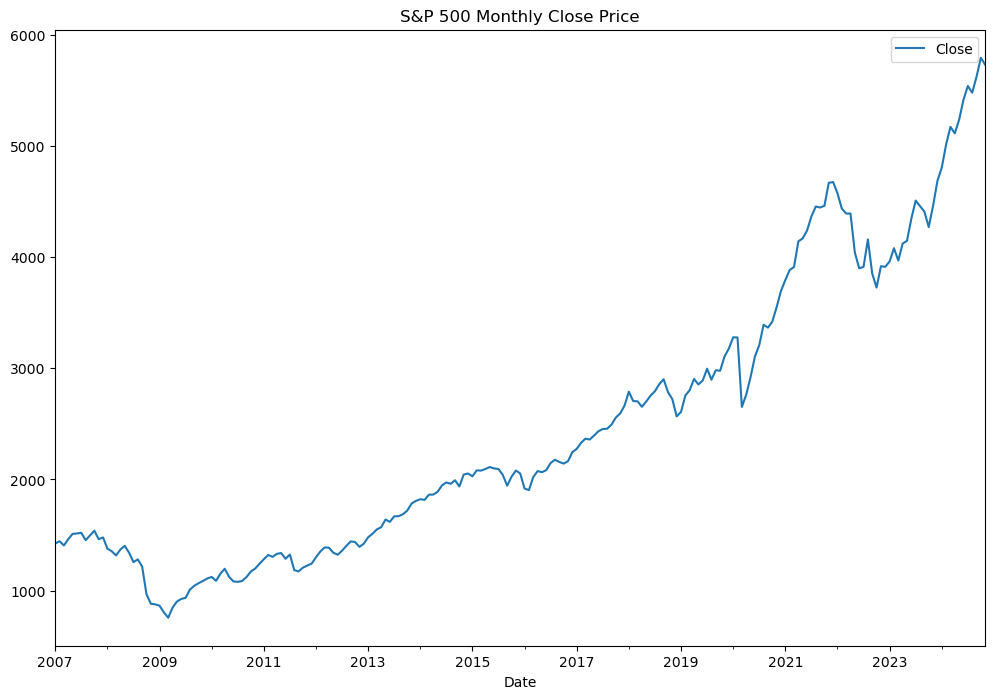

In [661]:
SNP_monthly.plot(figsize=(12, 8), title="S&P 500 Monthly Close Price")

In [662]:
#save the plot
plt.savefig("./graphs/SNP_monthly.png")

<Figure size 640x480 with 0 Axes>

In [663]:
Fedfunds_df = pd.read_csv("./Resources/FEDFUNDS.csv")

#show column names
#InterestRates_df.columns

Fedfunds_df.head()

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83


In [664]:
#set DATE Columen as the index
Fedfunds_df.set_index('DATE', inplace=True)
Fedfunds_df.head()


,FEDFUNDS
DATE,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83


In [665]:
#parese the date
Fedfunds_df.index = pd.to_datetime(Fedfunds_df.index)
Fedfunds_df.head()

,FEDFUNDS
DATE,
1954-07-01,0.80
1954-08-01,1.22
1954-09-01,1.07
1954-10-01,0.85
1954-11-01,0.83


In [666]:
#keep data only after 2008
Fedfunds_df = Fedfunds_df.loc['2006':]
Fedfunds_df.head()

,FEDFUNDS
DATE,
2006-01-01,4.29
2006-02-01,4.49
2006-03-01,4.59
2006-04-01,4.79
2006-05-01,4.94


In [667]:
#Rename DATE columen to Date
Fedfunds_df.index.names = ['Date']
Fedfunds_df.head()

,FEDFUNDS
Date,
2006-01-01,4.29
2006-02-01,4.49
2006-03-01,4.59
2006-04-01,4.79
2006-05-01,4.94


In [668]:
#Rename Column Name FEDFUNDS to FedRate
Fedfunds_df.columns = ['FedRate']
Fedfunds_df.head()

,FedRate
Date,
2006-01-01,4.29
2006-02-01,4.49
2006-03-01,4.59
2006-04-01,4.79
2006-05-01,4.94


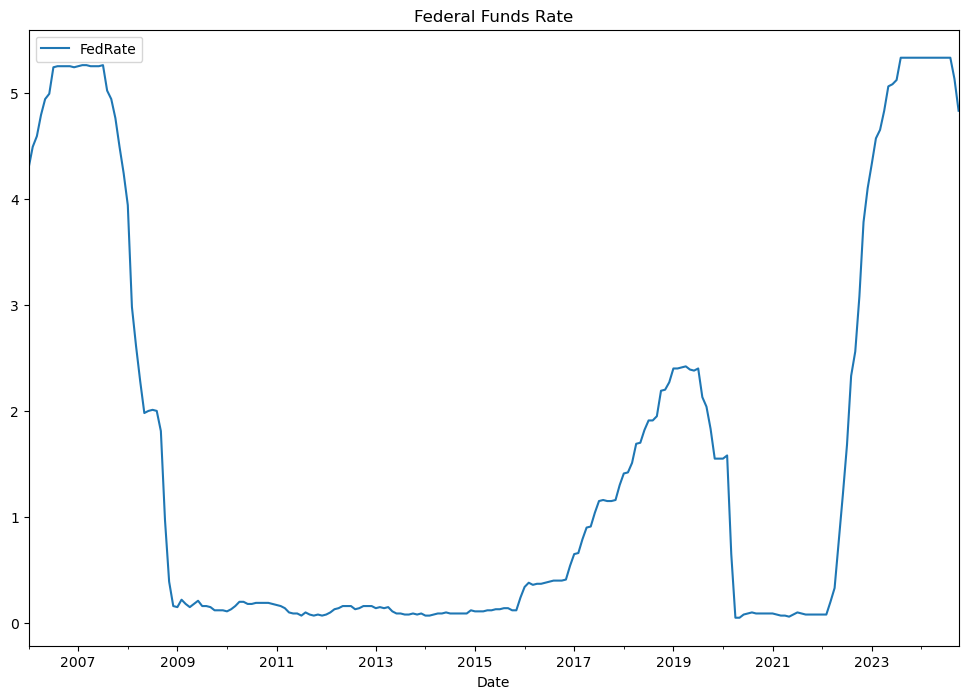

In [669]:
#plot the data
Fedfunds_df.plot(figsize=(12, 8), title="Federal Funds Rate")

#save the plot
plt.savefig("./graphs/FedFundsRate.png")

In [670]:
Unemployment_df = pd.read_csv("./Resources/bls-monthly-unemployment.csv")
Unemployment_df.head()

,Series ID,Year,Period,Label,Value
0,LNS14000000,2000,M01,2000 Jan,4.0
1,LNS14000000,2000,M02,2000 Feb,4.1
2,LNS14000000,2000,M03,2000 Mar,4.0
3,LNS14000000,2000,M04,2000 Apr,3.8
4,LNS14000000,2000,M05,2000 May,4.0


In [671]:
#drop columens Series ID, Period and Year
Unemployment_df = Unemployment_df.drop(columns=['Series ID', 'Period', 'Year'])
Unemployment_df.head()

,Label,Value
0,2000 Jan,4.0
1,2000 Feb,4.1
2,2000 Mar,4.0
3,2000 Apr,3.8
4,2000 May,4.0


In [672]:
#set the Lebal columen as the index
Unemployment_df.set_index('Label', inplace=True)
Unemployment_df.head()

,Value
Label,
2000 Jan,4.0
2000 Feb,4.1
2000 Mar,4.0
2000 Apr,3.8
2000 May,4.0


In [673]:
#Rename the Lebal colume as Date and sort the index
Unemployment_df.index.names = ['Date']
Unemployment_df = Unemployment_df.sort_index()
Unemployment_df.head()

,Value
Date,
2000 Apr,3.8
2000 Aug,4.1
2000 Dec,3.9
2000 Feb,4.1
2000 Jan,4.0


In [674]:
#parse the date in year-month-day format
Unemployment_df.index = pd.to_datetime(Unemployment_df.index)
Unemployment_df.head()

/var/folders/v3/3x37jm396m15n05th_799pjw0000gn/T/ipykernel_49122/791520179.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Unemployment_df.index = pd.to_datetime(Unemployment_df.index)


,Value
Date,
2000-04-01,3.8
2000-08-01,4.1
2000-12-01,3.9
2000-02-01,4.1
2000-01-01,4.0


In [675]:
#sort the date
Unemployment_df = Unemployment_df.sort_index()
Unemployment_df.head()

,Value
Date,
2000-01-01,4.0
2000-02-01,4.1
2000-03-01,4.0
2000-04-01,3.8
2000-05-01,4.0


In [676]:
#select only the data from 2008 onwards
Unemployment_df = Unemployment_df.loc['2006':]
Unemployment_df.head()

,Value
Date,
2006-01-01,4.7
2006-02-01,4.8
2006-03-01,4.7
2006-04-01,4.7
2006-05-01,4.6


In [677]:
#rename Value column to Unemployment Rate
Unemployment_df = Unemployment_df.rename(columns={'Value':'Unemployment Rate'})
Unemployment_df.head()

,Unemployment Rate
Date,
2006-01-01,4.7
2006-02-01,4.8
2006-03-01,4.7
2006-04-01,4.7
2006-05-01,4.6


In [678]:
#resample the data to get the average unemployment rate for each month
Unemployment_monthly = Unemployment_df.resample('MS').mean()
Unemployment_monthly.head()

,Unemployment Rate
Date,
2006-01-01,4.7
2006-02-01,4.8
2006-03-01,4.7
2006-04-01,4.7
2006-05-01,4.6


In [679]:
#keep only data before November 1st 2024
Unemployment_df = Unemployment_df.loc[:'2024-11-01']
Unemployment_df.tail()

,Unemployment Rate
Date,
2024-06-01,4.1
2024-07-01,4.3
2024-08-01,4.2
2024-09-01,4.1
2024-10-01,4.1


In [680]:
Treasuries10Y_df = pd.read_csv("./Resources/10YTreasury.csv")
Treasuries10Y_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,6.498,6.603,6.498,6.548,6.548,0.0
1,2000-01-04,6.530,6.548,6.485,6.485,6.485,0.0
2,2000-01-05,6.521,6.599,6.508,6.599,6.599,0.0
3,2000-01-06,6.558,6.585,6.540,6.549,6.549,0.0
4,2000-01-07,6.545,6.595,6.504,6.504,6.504,0.0


In [681]:
#set Date column as the index and sort the index
Treasuries10Y_df.set_index('Date', inplace=True)
Treasuries10Y_df = Treasuries10Y_df.sort_index()
Treasuries10Y_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,6.498,6.603,6.498,6.548,6.548,0.0
2000-01-04,6.530,6.548,6.485,6.485,6.485,0.0
2000-01-05,6.521,6.599,6.508,6.599,6.599,0.0
2000-01-06,6.558,6.585,6.540,6.549,6.549,0.0
2000-01-07,6.545,6.595,6.504,6.504,6.504,0.0


In [682]:
#drop the Open, High, Low and Volumn columns
Treasuries10Y_df = Treasuries10Y_df.drop(columns=['Open', 'High', 'Low', 'Volume'])
Treasuries10Y_df.head()

,Close,Adj Close
Date,,
2000-01-03,6.548,6.548
2000-01-04,6.485,6.485
2000-01-05,6.599,6.599
2000-01-06,6.549,6.549
2000-01-07,6.504,6.504


In [683]:
#drop AdjClose column
Treasuries10Y_df = Treasuries10Y_df.drop(columns=['Adj Close'])
Treasuries10Y_df.head()

,Close
Date,
2000-01-03,6.548
2000-01-04,6.485
2000-01-05,6.599
2000-01-06,6.549
2000-01-07,6.504


In [684]:
#rename Close column to 10YTrate
Treasuries10Y_df = Treasuries10Y_df.rename(columns={'Close':'10YTrate'})
Treasuries10Y_df.head()

,10YTrate
Date,
2000-01-03,6.548
2000-01-04,6.485
2000-01-05,6.599
2000-01-06,6.549
2000-01-07,6.504


In [685]:
#set Date as date format Year-Month-Day
Treasuries10Y_df.index = pd.to_datetime(Treasuries10Y_df.index)
Treasuries10Y_df.head()

,10YTrate
Date,
2000-01-03,6.548
2000-01-04,6.485
2000-01-05,6.599
2000-01-06,6.549
2000-01-07,6.504


In [686]:
#drop any missing values
Treasuries10Y_df = Treasuries10Y_df.dropna()
Treasuries10Y_df.head()

,10YTrate
Date,
2000-01-03,6.548
2000-01-04,6.485
2000-01-05,6.599
2000-01-06,6.549
2000-01-07,6.504


In [687]:
Treasuries10Y_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6252 entries, 2000-01-03 to 2024-11-14
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   10YTrate  6252 non-null   float64
dtypes: float64(1)
memory usage: 97.7 KB


In [688]:
#resample the data to monthly
Treasuries10Y_df = Treasuries10Y_df.resample('MS').mean()
Treasuries10Y_df.head()

,10YTrate
Date,
2000-01-01,6.647250
2000-02-01,6.517600
2000-03-01,6.246826
2000-04-01,5.978579
2000-05-01,6.427227


In [689]:
#keep data from 2006 onwards
Treasuries10Y_df = Treasuries10Y_df.loc['2006':]

In [690]:
#remove data after Nov 1st 2024
Treasuries10Y_df = Treasuries10Y_df.loc[:'2024-11-01']
Treasuries10Y_df.tail()

,10YTrate
Date,
2024-07-01,4.246091
2024-08-01,3.870409
2024-09-01,3.719650
2024-10-01,4.092913
2024-11-01,4.364100


In [691]:
#import Gold data 
Gold_df = pd.read_csv("./Resources/GoldPricesMonthly.csv")
Gold_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,268.399994,268.399994,268.399994,268.399994,268.399994,0.0
1,2001-01-03,268.000000,268.000000,268.000000,268.000000,268.000000,1.0
2,2001-01-04,267.299988,267.299988,267.299988,267.299988,267.299988,1.0
3,2001-01-05,268.000000,268.000000,268.000000,268.000000,268.000000,0.0
4,2001-01-08,268.000000,268.000000,268.000000,268.000000,268.000000,0.0


In [692]:
#set Date column as the index and sort the index
#drop Open, High, Low, Adjusted Close and Volume columns
#set date to datetime format Year-Month-Day
Gold_df.set_index('Date', inplace=True)
Gold_df = Gold_df.sort_index()
Gold_df = Gold_df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
Gold_df.index = pd.to_datetime(Gold_df.index)
Gold_df.head()

,Close
Date,
2001-01-02,268.399994
2001-01-03,268.000000
2001-01-04,267.299988
2001-01-05,268.000000
2001-01-08,268.000000


In [693]:
#rename Close column to GoldPrice
Gold_df = Gold_df.rename(columns={'Close':'GoldPrice'})
Gold_df.head()

,GoldPrice
Date,
2001-01-02,268.399994
2001-01-03,268.000000
2001-01-04,267.299988
2001-01-05,268.000000
2001-01-08,268.000000


In [694]:
#remove data after Nov 1st 2024
Gold_df = Gold_df.loc[:'2024-11-01']
Gold_df.tail()

,GoldPrice
Date,
2024-10-28,2742.899902
2024-10-29,2768.399902
2024-10-30,2788.500000
2024-10-31,2738.300049
2024-11-01,2738.600098


In [695]:
#keep data from 2006 onwards
Gold_df = Gold_df.loc['2006':]
Gold_df.head()

,GoldPrice
Date,
2006-01-02,NaN
2006-01-03,530.700012
2006-01-04,533.900024
2006-01-05,526.299988
2006-01-06,539.700012


In [696]:
#drop NA values
Gold_df = Gold_df.dropna()  
Gold_df.head()

,GoldPrice
Date,
2006-01-03,530.700012
2006-01-04,533.900024
2006-01-05,526.299988
2006-01-06,539.700012
2006-01-09,549.099976


In [697]:
#read in the inflation file
Inflation_df = pd.read_csv("./Resources/inflation_rate_US.csv")

#set the date as the inde
Inflation_df.set_index('DateTime', inplace=True)

#parse the date
Inflation_df.index = pd.to_datetime(Inflation_df.index)

#rename the column Close to InflationRate
Inflation_df = Inflation_df.rename(columns={'Close':'InflationRate'})

#rename  the Datetime column to Date
Inflation_df.index.names = ['Date']

#select only data from 2006 onwards
Inflation_df = Inflation_df.loc['2006':]

Inflation_df.head()


,Country,Category,InflationRate,Frequency,HistoricalDataSymbol,LastUpdate
Date,,,,,,
2006-01-31,United States,Inflation Rate,4.0,Monthly,CPI YOY,2015-02-26T15:56:00
2006-02-28,United States,Inflation Rate,3.6,Monthly,CPI YOY,2015-02-26T15:56:00
2006-03-31,United States,Inflation Rate,3.4,Monthly,CPI YOY,2015-02-26T15:56:00
2006-04-30,United States,Inflation Rate,3.5,Monthly,CPI YOY,2015-02-26T15:56:00
2006-05-31,United States,Inflation Rate,4.2,Monthly,CPI YOY,2015-02-26T15:56:00


In [698]:
#set the date to year-month-day format
Inflation_df.index = pd.to_datetime(Inflation_df.index)

#shift the date to the first of the month
    
def shift_to_first_of_month(given_date):
    return given_date.replace(day=1)

#use shift_to_first_of_month function to shift the date to the first of the month
Inflation_df.index = Inflation_df.index.map(shift_to_first_of_month)

#Inflation_df = Inflation_df.resample('MS').mean()
#Inflation_df.index = Inflation_df.index.to_period('M').to_timestamp('M')

#sort the index
Inflation_df = Inflation_df.sort_index()
Inflation_df.head()

,Country,Category,InflationRate,Frequency,HistoricalDataSymbol,LastUpdate
Date,,,,,,
2006-01-01,United States,Inflation Rate,4.0,Monthly,CPI YOY,2015-02-26T15:56:00
2006-02-01,United States,Inflation Rate,3.6,Monthly,CPI YOY,2015-02-26T15:56:00
2006-03-01,United States,Inflation Rate,3.4,Monthly,CPI YOY,2015-02-26T15:56:00
2006-04-01,United States,Inflation Rate,3.5,Monthly,CPI YOY,2015-02-26T15:56:00
2006-05-01,United States,Inflation Rate,4.2,Monthly,CPI YOY,2015-02-26T15:56:00


In [699]:
#drop columns Country, Category, Frequency, Frequency, HistoricalDataSymbol, Last Update
Inflation_df = Inflation_df.drop(columns=['Country', 'Category', 'Frequency', 'HistoricalDataSymbol', 'LastUpdate'])
Inflation_df.head()

,InflationRate
Date,
2006-01-01,4.0
2006-02-01,3.6
2006-03-01,3.4
2006-04-01,3.5
2006-05-01,4.2


In [700]:
#print all the dataframes
print(SNP_monthly_df.head())
print(Fedfunds_df.head())
print(Unemployment_df.head())
print(Treasuries10Y_df.head())
print(Gold_df.head())
print(Inflation_df.head())


              SNP_Close
Date                   
2007-01-01  1424.161500
2007-02-01  1444.794737
2007-03-01  1406.952273
2007-04-01  1463.647500
2007-05-01  1511.136818
            FedRate
Date               
2006-01-01     4.29
2006-02-01     4.49
2006-03-01     4.59
2006-04-01     4.79
2006-05-01     4.94
            Unemployment Rate
Date                         
2006-01-01                4.7
2006-02-01                4.8
2006-03-01                4.7
2006-04-01                4.7
2006-05-01                4.6
            10YTrate
Date                
2006-01-01  4.410600
2006-02-01  4.567842
2006-03-01  4.722304
2006-04-01  4.985368
2006-05-01  5.106909
             GoldPrice
Date                  
2006-01-03  530.700012
2006-01-04  533.900024
2006-01-05  526.299988
2006-01-06  539.700012
2006-01-09  549.099976
            InflationRate
Date                     
2006-01-01            4.0
2006-02-01            3.6
2006-03-01            3.4
2006-04-01            3.5
2006-05-01        

In [701]:
#conatinating all the dataframes
economic_data_df = pd.concat([SNP_monthly_df, Treasuries10Y_df, Gold_df, Fedfunds_df, Unemployment_monthly, Inflation_df], axis=1, join='inner')
economic_data_df.head()

#export the data to a csv file
economic_data_df.to_csv('./Resources/economic_data.csv')


In [702]:
#correration matrix
correlation_matrix = economic_data_df.corr()
correlation_matrix

,SNP_Close,10YTrate,GoldPrice,FedRate,Unemployment Rate,InflationRate
SNP_Close,1.000000,0.011225,0.766654,0.473314,-0.574571,0.513065
10YTrate,0.011225,1.000000,-0.184239,0.728702,-0.246249,0.199084
GoldPrice,0.766654,-0.184239,1.000000,0.186971,-0.136038,0.398106
FedRate,0.473314,0.728702,0.186971,1.000000,-0.564746,0.287560
Unemployment Rate,-0.574571,-0.246249,-0.136038,-0.564746,1.000000,-0.449898
InflationRate,0.513065,0.199084,0.398106,0.287560,-0.449898,1.000000


In [703]:
plt.savefig("correclation_matrix.png")  # Save the graph

<Figure size 640x480 with 0 Axes>

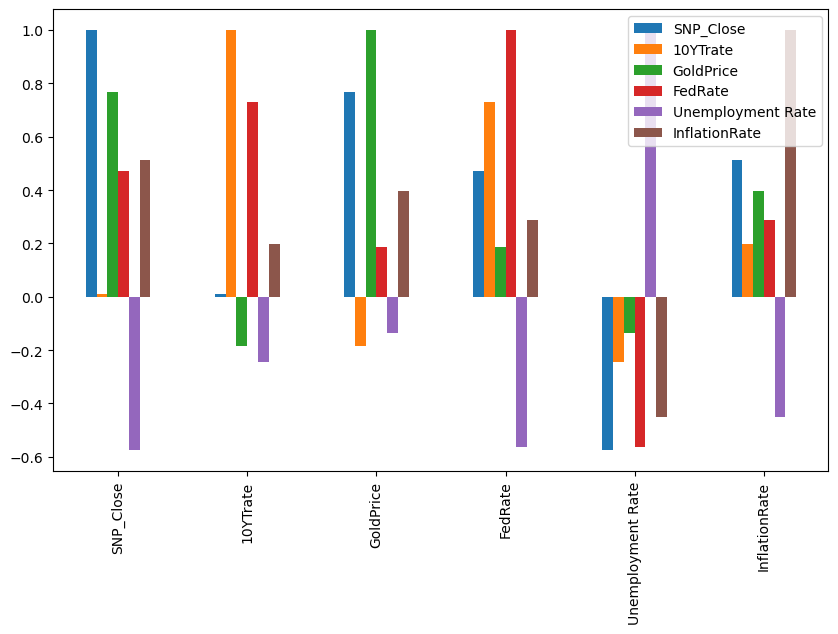

In [704]:
Plot = correlation_matrix.plot(kind='bar', figsize=(10, 6))

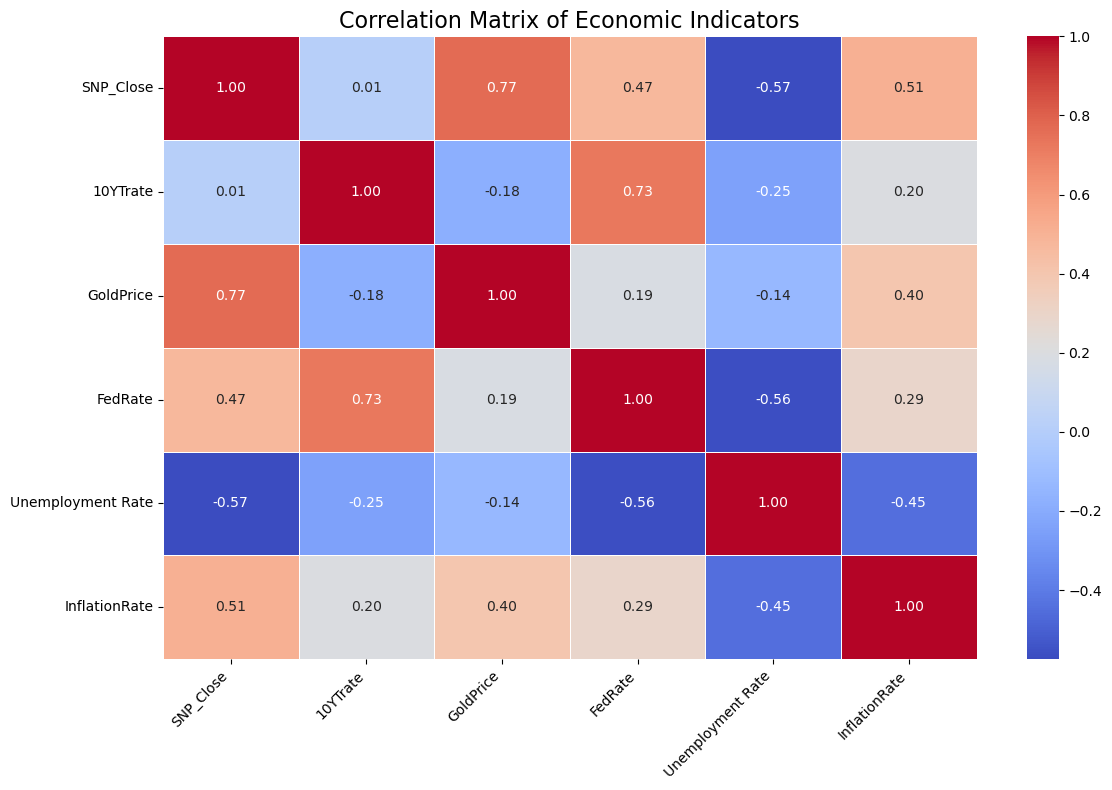

In [705]:
#Correlation matrix plot
correlation_matrix = economic_data_df.corr()
plt.figure(figsize=(12, 8))  # Adjust figure size for better readability
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Economic Indicators', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.savefig("./graphs/correlation_matrix.png")  # Save the plot as png
plt.show()

<Axes: xlabel='Date'>

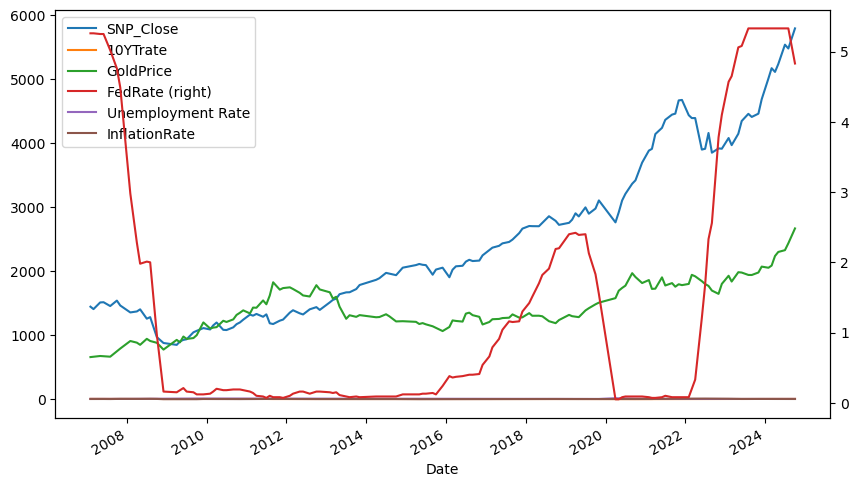

In [706]:
#plot the economic data dataframe to scale
economic_data_df.plot(secondary_y=['FedRate'], figsize=(10, 6))

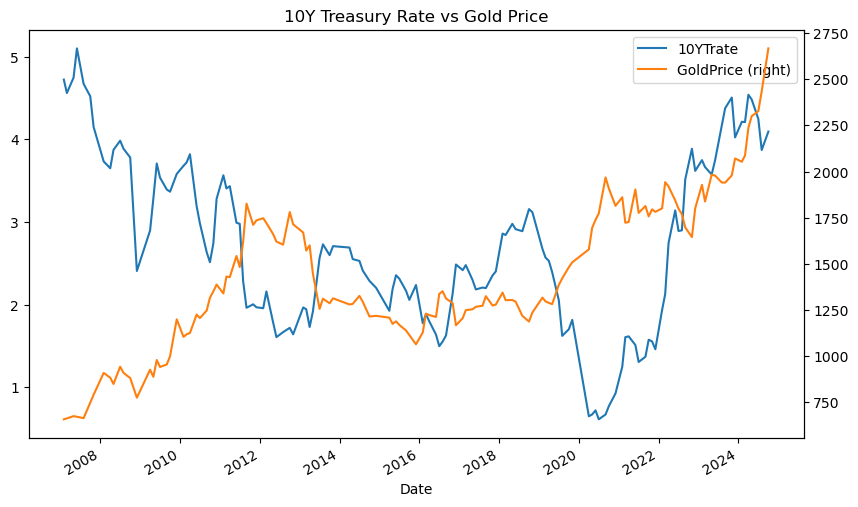

In [707]:
#plot Treasuries10Y_df and Gold_df
economic_data_df[['10YTrate', 'GoldPrice']].plot(secondary_y=['GoldPrice'], figsize=(10, 6), title="10Y Treasury Rate vs Gold Price")

#save the plot
plt.savefig("./graphs/Treasury10YvsGold.png")

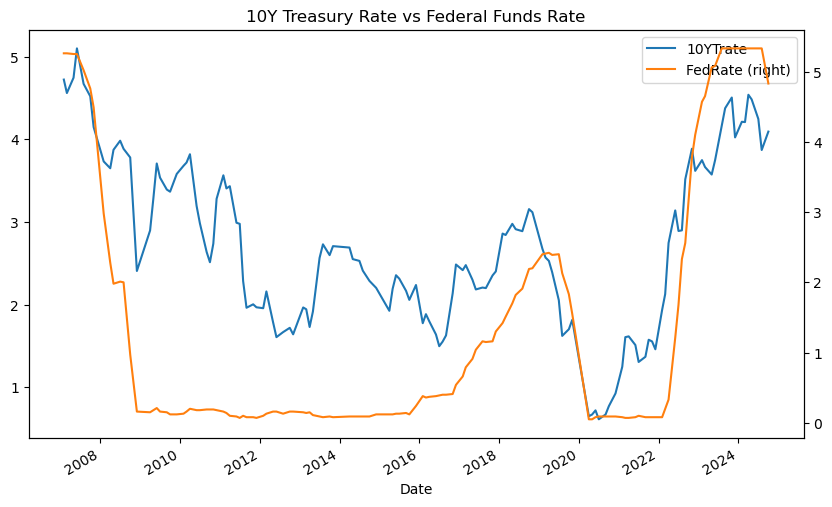

In [708]:
#plot Treasuries10Y_df and Fedrate
economic_data_df[['10YTrate', 'FedRate']].plot(secondary_y=['FedRate'], figsize=(10, 6), title="10Y Treasury Rate vs Federal Funds Rate")

#save the plot
plt.savefig("./graphs/Treasury10YvsFedRate.png")

<Axes: xlabel='Date'>

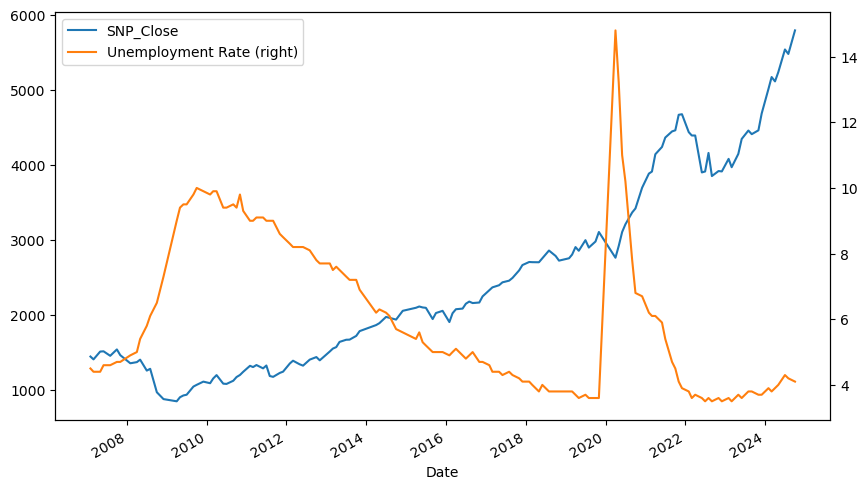

In [709]:
#plot the SNP_Monthly_df and the unemployment rate
economic_data_df[['SNP_Close', 'Unemployment Rate']].plot(secondary_y=['Unemployment Rate'], figsize=(10, 6))


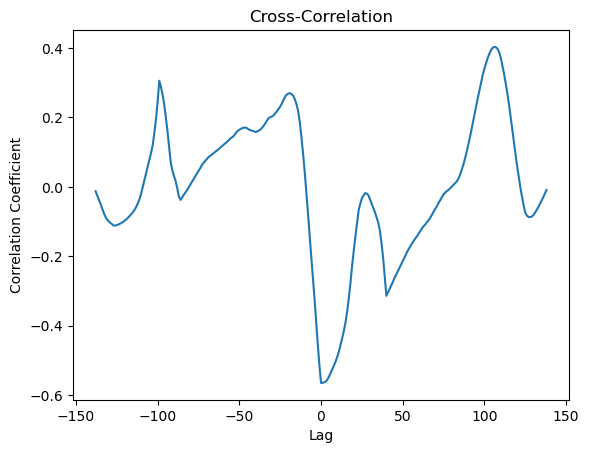

In [710]:
#plot the croos correlation between the SNP_Close and the Unemployment Rate
x = economic_data_df['FedRate']
y = economic_data_df['Unemployment Rate']

# Compute cross-correlation
cross_corr = np.correlate(x - np.mean(x), y - np.mean(y), mode='full')
lags = np.arange(-len(x) + 1, len(x))  # Lags associated with cross-correlation

# Normalize the cross-correlation
cross_corr /= (np.std(x) * np.std(y) * len(x))

# Plot the cross-correlation
plt.plot(lags, cross_corr)
plt.title("Cross-Correlation")
plt.xlabel("Lag")
plt.ylabel("Correlation Coefficient")
plt.show()

<Axes: xlabel='Date'>

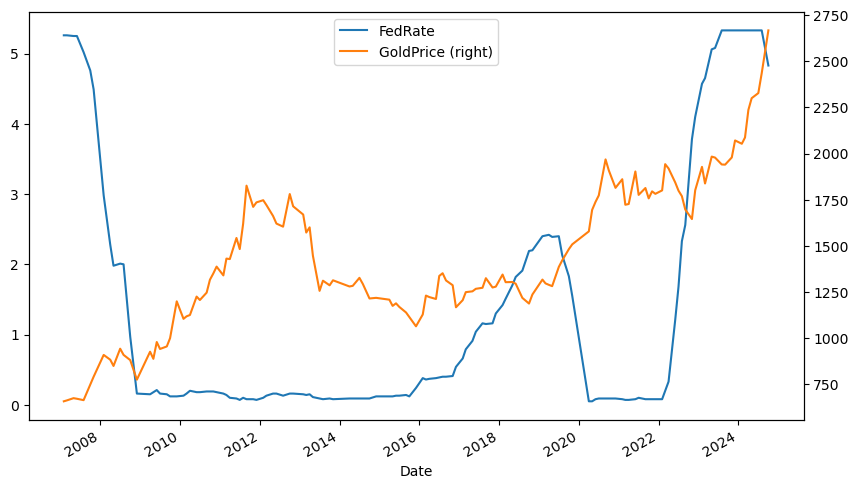

In [711]:
#plot the FedRate and the Gold Price
economic_data_df[['FedRate', 'GoldPrice']].plot(secondary_y=['GoldPrice'], figsize=(10, 6))


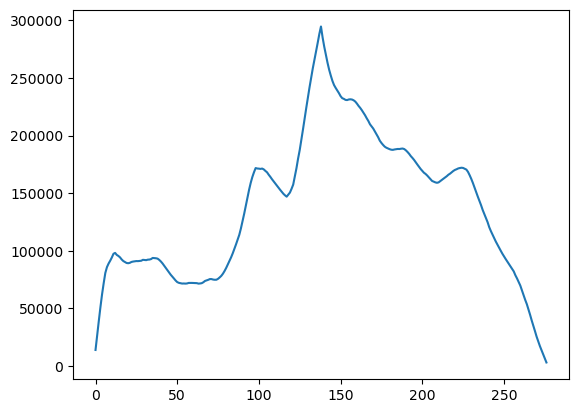

In [712]:
#plot the cross correlation between the FedRate and the Gold Price
cross_correlation = correlate(economic_data_df['FedRate'], economic_data_df['GoldPrice'])
plt.plot(cross_correlation)


<Axes: xlabel='Date'>

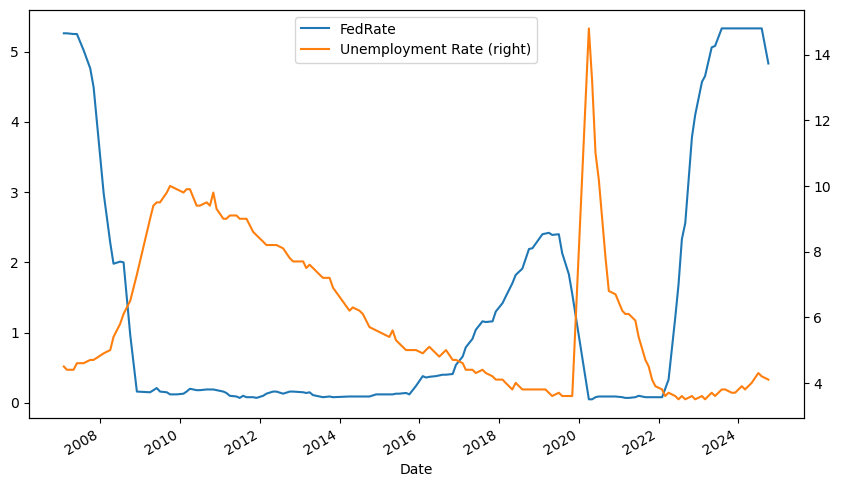

In [713]:
#plot fed rate and unemployment rate
economic_data_df[['FedRate', 'Unemployment Rate']].plot(secondary_y=['Unemployment Rate'], figsize=(10, 6))


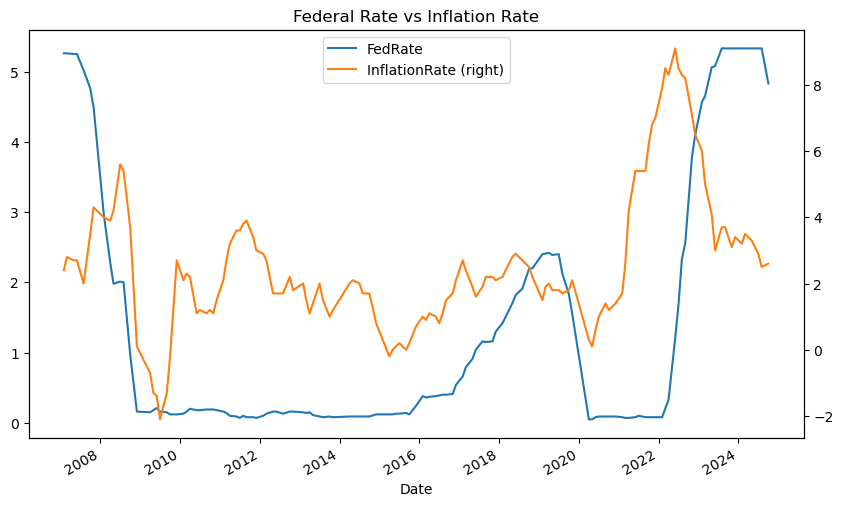

In [714]:
#plot fed rate and inflation with title
 
economic_data_df[['FedRate', 'InflationRate']].plot(secondary_y=['InflationRate'], figsize=(10, 6), title="Federal Rate vs Inflation Rate")

#save the graph
plt.savefig("FedRate_vs_InflationRate.png")


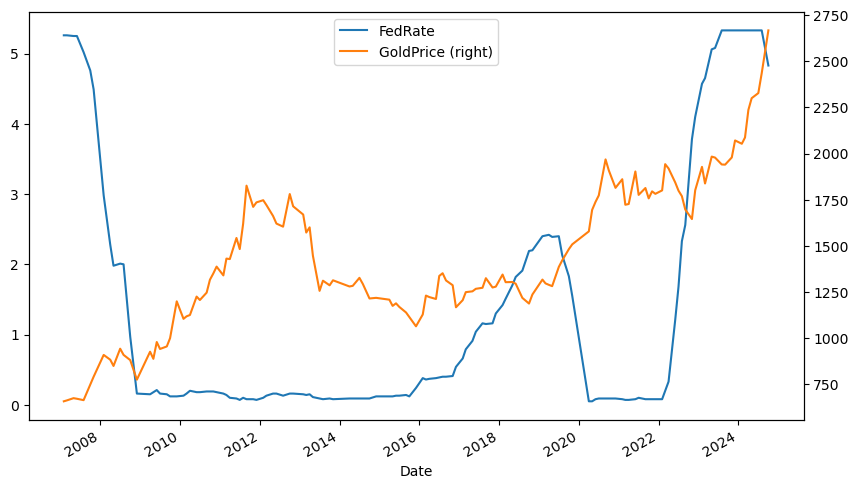

In [715]:
#plot fed rate and gold prices
economic_data_df[['FedRate', 'GoldPrice']].plot(secondary_y=['GoldPrice'], figsize=(10, 6))
#save the plot
plt.savefig("./graphs/FedRate_GoldPrice.png")


,SNP_Close,10YTrate,GoldPrice,FedRate,Unemployment Rate,InflationRate
Date,,,,,,
2007-02-01,1444.794737,4.721789,657.400024,5.26,4.5,2.4
2007-03-01,1406.952273,4.559091,662.299988,5.26,4.4,2.8
2007-05-01,1511.136818,4.744273,674.400024,5.25,4.4,2.7
2007-06-01,1514.489524,5.098714,671.200012,5.25,4.6,2.7
2007-08-01,1454.616957,4.670174,663.599976,5.02,4.6,2.0


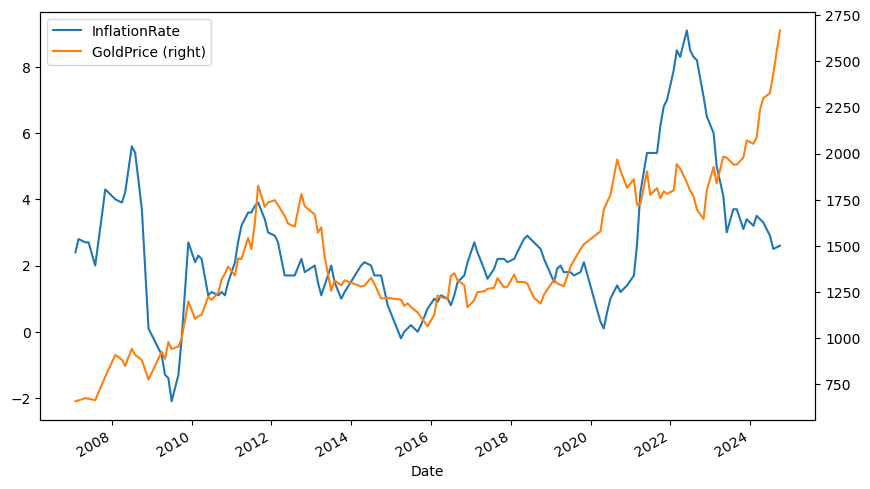

In [716]:
#plot inflation rate and gold price
economic_data_df[['InflationRate', 'GoldPrice']].plot(secondary_y=['GoldPrice'], figsize=(10, 6))
economic_data_df.head()

<Axes: xlabel='Date'>

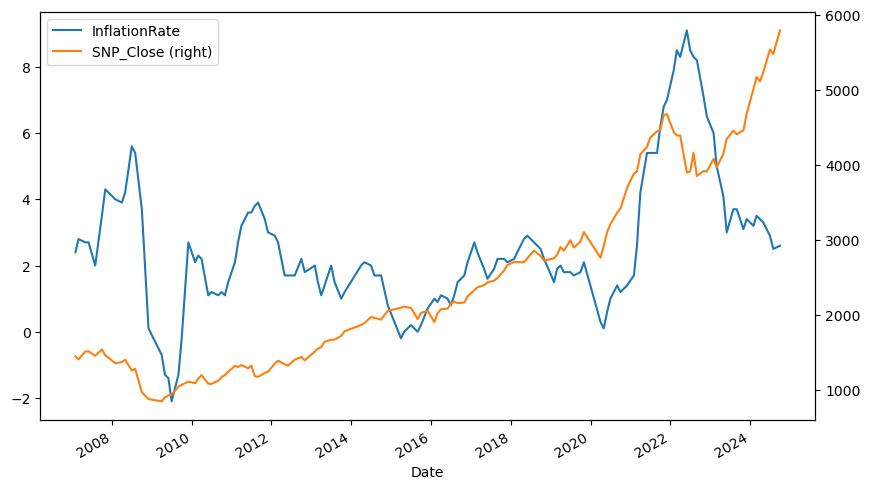

In [717]:
#plot inflation rate and SNP_Close
economic_data_df[['InflationRate', 'SNP_Close']].plot(secondary_y=['SNP_Close'], figsize=(10, 6))

In [718]:
plt.savefig("inflation_FedRate.png")  # Save the graph

<Figure size 640x480 with 0 Axes>

<Axes: xlabel='Date'>

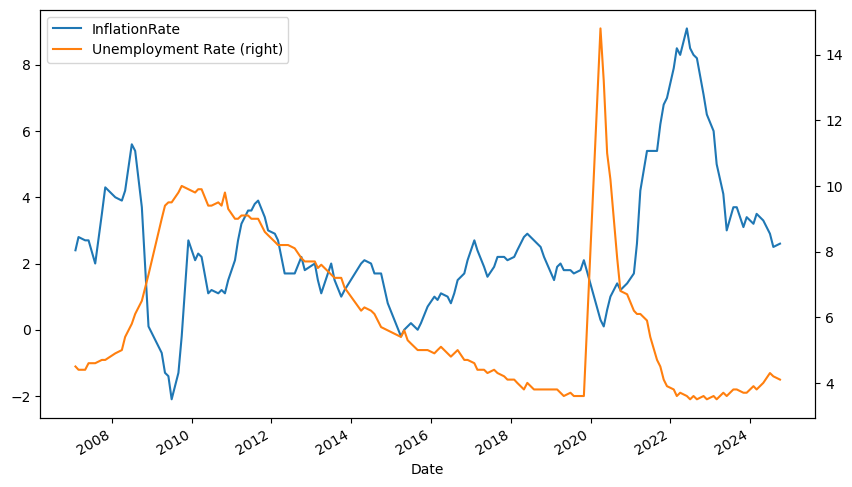

In [719]:
#plot inflation rate and unemployment rate
economic_data_df[['InflationRate', 'Unemployment Rate']].plot(secondary_y=['Unemployment Rate'], figsize=(10, 6))

In [720]:
plt.savefig("inflation_Unemployment.png")  # Save the graph

<Figure size 640x480 with 0 Axes>

In [721]:
#prep Unemployment data for prophet
#select date from 2007 onwards

Unemployment_df = Unemployment_df.reset_index()
Unemployment_df = Unemployment_df.rename(columns={'Date':'ds', 'Unemployment Rate':'y'})
Unemployment_df.head()


,ds,y
0,2006-01-01,4.7
1,2006-02-01,4.8
2,2006-03-01,4.7
3,2006-04-01,4.7
4,2006-05-01,4.6


In [722]:
# Sort the DataFrame by `ds` in ascending order
Unemployment_df = Unemployment_df.sort_values(by=["ds"], ascending=True)
#select only data from 2007  onwards

# Display sample data from head and tail
display(Unemployment_df.head(10))
display(Unemployment_df.tail(10))

,ds,y
0,2006-01-01,4.7
1,2006-02-01,4.8
2,2006-03-01,4.7
3,2006-04-01,4.7
4,2006-05-01,4.6
5,2006-06-01,4.6
6,2006-07-01,4.7
7,2006-08-01,4.7
8,2006-09-01,4.5
9,2006-10-01,4.4


,ds,y
216,2024-01-01,3.7
217,2024-02-01,3.9
218,2024-03-01,3.8
219,2024-04-01,3.9
220,2024-05-01,4.0
221,2024-06-01,4.1
222,2024-07-01,4.3
223,2024-08-01,4.2
224,2024-09-01,4.1
225,2024-10-01,4.1


In [723]:
# Call the Prophet function, store as an object
model = Prophet()
model

In [724]:
#fit the model
model.fit(Unemployment_df)


20:24:28 - cmdstanpy - INFO - Chain [1] start processing
20:24:28 - cmdstanpy - INFO - Chain [1] done processing


In [725]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 12 months
future_unemployment = model.make_future_dataframe(periods=12, freq="ME")

# View the last five rows of the predictions
future_unemployment.tail()

,ds
233,2025-05-31
234,2025-06-30
235,2025-07-31
236,2025-08-31
237,2025-09-30


In [726]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_unemployment = model.predict(future_unemployment)

# Display the first five rows of the forecast DataFrame
forecast_unemployment.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-01-01,4.856087,2.912759,6.726646,4.856087,4.856087,-0.075829,-0.075829,-0.075829,-0.075829,-0.075829,-0.075829,0.0,0.0,0.0,4.780258
1,2006-02-01,4.915072,2.874057,6.807314,4.915072,4.915072,-0.129683,-0.129683,-0.129683,-0.129683,-0.129683,-0.129683,0.0,0.0,0.0,4.785389
2,2006-03-01,4.968348,3.203343,6.968889,4.968348,4.968348,0.022557,0.022557,0.022557,0.022557,0.022557,0.022557,0.0,0.0,0.0,4.990905
3,2006-04-01,5.027333,3.317427,7.227127,5.027333,5.027333,0.364796,0.364796,0.364796,0.364796,0.364796,0.364796,0.0,0.0,0.0,5.392128
4,2006-05-01,5.084414,3.449591,7.248894,5.084414,5.084414,0.315048,0.315048,0.315048,0.315048,0.315048,0.315048,0.0,0.0,0.0,5.399463


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


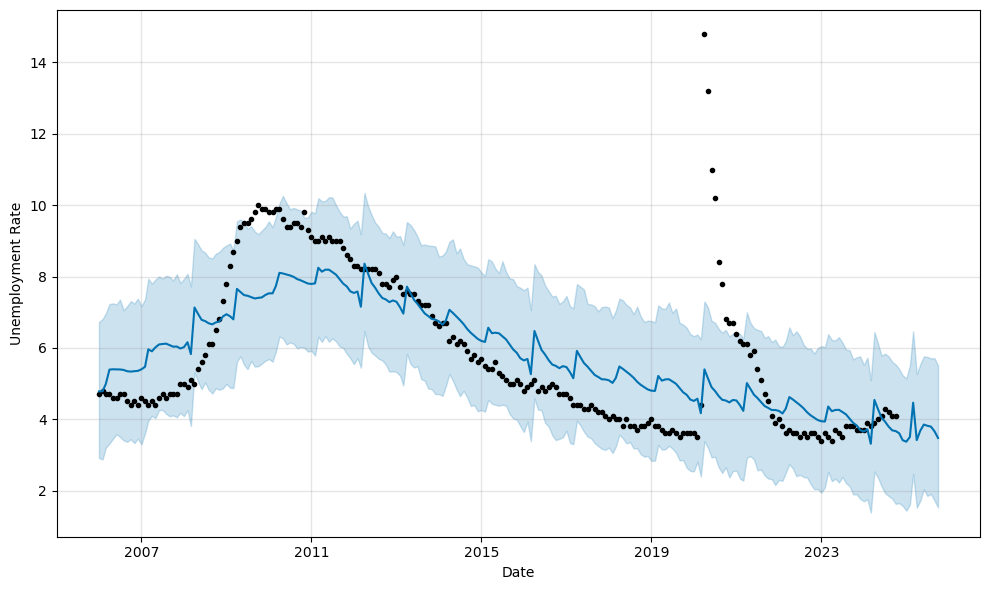

In [738]:
# Plot the Prophet predictions for the Mercado trends data
model.plot(forecast_unemployment, xlabel="Date", ylabel="Unemployment Rate") 

#save the plot
plt.savefig("./graphs/Unemployment_Prediction.png")

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

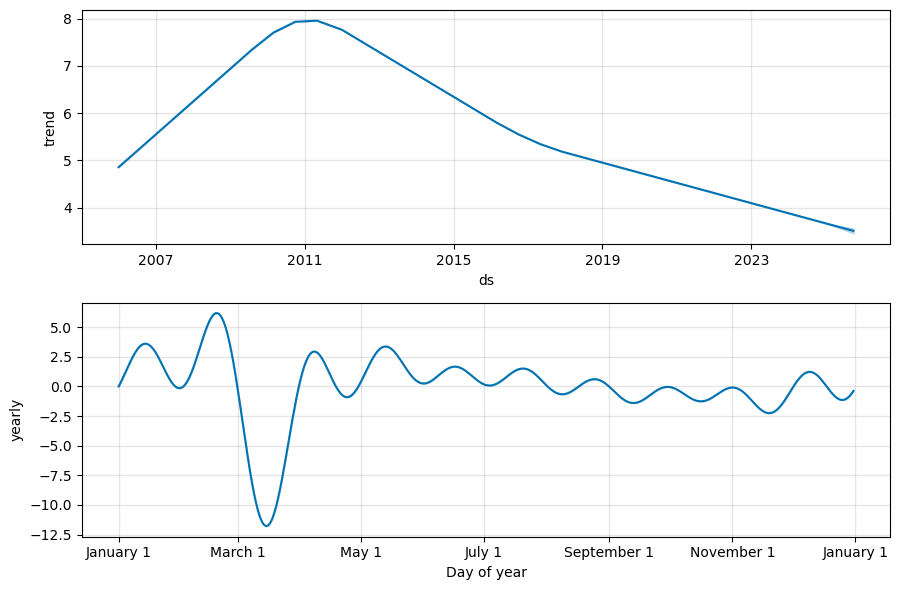

In [739]:
# Use the plot_components function to visualize the forecast results 
figures = model.plot_components(forecast_unemployment)

#save the plot
plt.savefig("./graphs/Unemployment_Components.png")


In [729]:
#prep Unemployment data for prophet
Inflation_df_p = Inflation_df.reset_index()
Inflation_df_p.head()

,Date,InflationRate
0,2006-01-01,4.0
1,2006-02-01,3.6
2,2006-03-01,3.4
3,2006-04-01,3.5
4,2006-05-01,4.2


In [730]:
Inflation_df_p = Inflation_df_p.rename(columns={'Date':'ds', 'InflationRate':'y'})
Inflation_df_p.head()

,ds,y
0,2006-01-01,4.0
1,2006-02-01,3.6
2,2006-03-01,3.4
3,2006-04-01,3.5
4,2006-05-01,4.2


In [731]:
# Sort the DataFrame by `ds` in ascending order
Inflation_df_p = Inflation_df_p.sort_values(by=["ds"], ascending=True)

# Display sample data from head and tail
display(Inflation_df_p.head(10))
display(Inflation_df_p.tail(10))

,ds,y
0,2006-01-01,4.0
1,2006-02-01,3.6
2,2006-03-01,3.4
3,2006-04-01,3.5
4,2006-05-01,4.2
5,2006-06-01,4.3
6,2006-07-01,4.1
7,2006-08-01,3.8
8,2006-09-01,2.1
9,2006-10-01,1.3


,ds,y
216,2024-01-01,3.1
217,2024-02-01,3.2
218,2024-03-01,3.5
219,2024-04-01,3.4
220,2024-05-01,3.3
221,2024-06-01,3.0
222,2024-07-01,2.9
223,2024-08-01,2.5
224,2024-09-01,2.4
225,2024-10-01,2.6


In [732]:
# Call the Prophet function, store as an object
inflation_model = Prophet()

In [733]:
# Fit the Prophet model.
inflation_model.fit(Inflation_df_p)

20:24:29 - cmdstanpy - INFO - Chain [1] start processing


20:24:29 - cmdstanpy - INFO - Chain [1] done processing


In [734]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 12 months
future_inflation = inflation_model.make_future_dataframe(periods=12, freq="M")

# View the last five rows of the predictions
future_inflation.tail()

/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


,ds
233,2025-05-31
234,2025-06-30
235,2025-07-31
236,2025-08-31
237,2025-09-30


In [735]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_inflation = inflation_model.predict(future_inflation)

# Display the first five rows of the forecast DataFrame
forecast_inflation.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-01-01,2.394201,0.231324,4.432227,2.394201,2.394201,0.077747,0.077747,0.077747,0.077747,0.077747,0.077747,0.0,0.0,0.0,2.471947
1,2006-02-01,2.387362,0.339847,4.638345,2.387362,2.387362,0.056344,0.056344,0.056344,0.056344,0.056344,0.056344,0.0,0.0,0.0,2.443705
2,2006-03-01,2.381185,0.315163,4.772868,2.381185,2.381185,0.048528,0.048528,0.048528,0.048528,0.048528,0.048528,0.0,0.0,0.0,2.429713
3,2006-04-01,2.374346,0.107809,4.662491,2.374346,2.374346,0.031946,0.031946,0.031946,0.031946,0.031946,0.031946,0.0,0.0,0.0,2.406292
4,2006-05-01,2.367727,0.171184,4.596556,2.367727,2.367727,0.045597,0.045597,0.045597,0.045597,0.045597,0.045597,0.0,0.0,0.0,2.413325


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


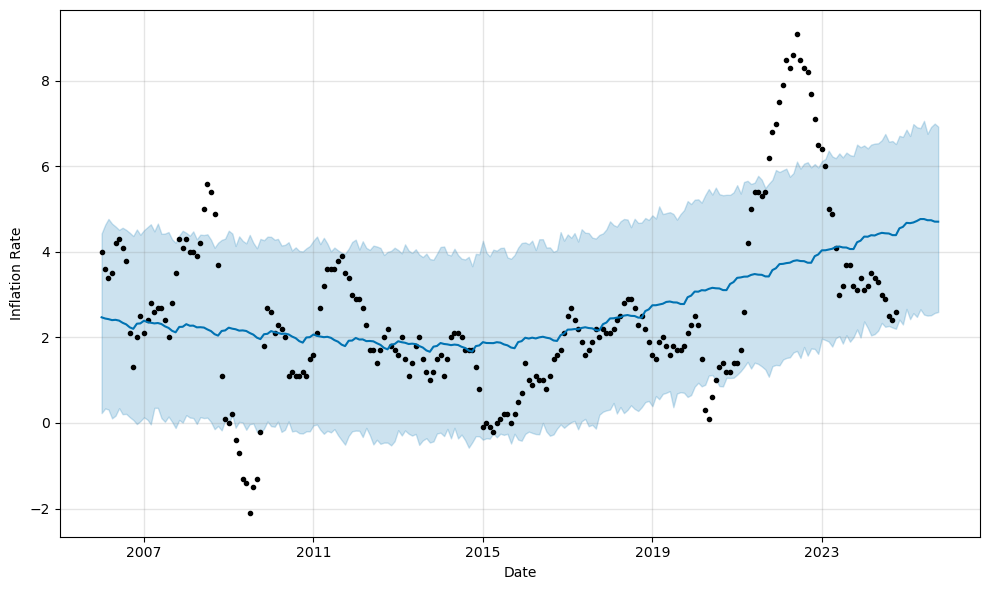

In [740]:
# Plot the Prophet predictions for the Mercado trends data
inflation_model.plot(forecast_inflation, xlabel="Date", ylabel="Inflation Rate")

#save the plot
plt.savefig("./graphs/Inflation_Prediction.png")


/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/opt/anaconda3/envs/dev/lib/python3.10/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To ret

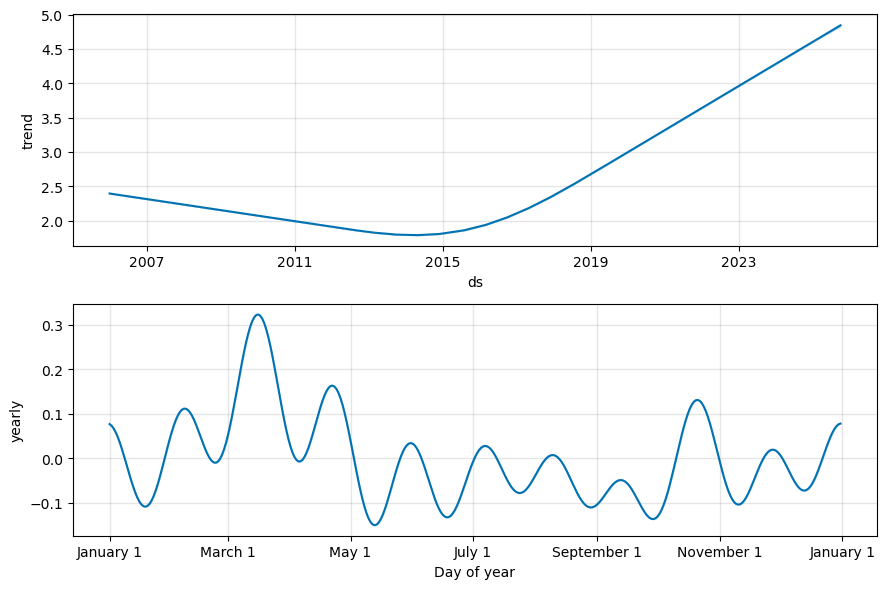

In [741]:
# Use the plot_components function to visualize the forecast results 
inflation_figures = inflation_model.plot_components(forecast_inflation) 

#save the plot
plt.savefig("./graphs/Inflation_Components.png")